## Steps to follow:

1. Import the data
2. Explore the data and identify things that would be worth exploring
3. Write two functions to make two different kinds of plots using matplotlib and seaborn (one each)
4. It might be a good idea to look at one of the categorical variables (gender, race/ethinicity) and the test scores 
5. Push your work back and send me a link to the repo!

In [1]:
# Import the data

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import csv to dataframe
df = pd.read_csv('StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
# Explore the data and identify things that would be worth exploring

# Show head and tail
print('==========================')
print('Head and Tail Preview')
print('==========================')
display(df)

# How many rows and columns
print('==========================')
print('Shape')
print('==========================')
display(df.shape)

# Summary stats for numerical features
print('==========================')
print('Summary Statistics')
print('==========================')
display(df.describe().T)

# Data types for each feature
print('==========================')
print('Data Types')
print('==========================')
display(df.dtypes)

# NAN's
print('==========================')
print('Any NANs?')
print('==========================')
display(df.isna().values.any())

# Value Counts
print('==========================')
print('Feature Value Counts')
print('==========================')

for col in df.columns:
    print('--------------------------')
    print('Value Counts for', col)
    print('--------------------------')
    display(df[col].value_counts(dropna=False))

Head and Tail Preview


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Shape


(1000, 8)

Summary Statistics


,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Data Types


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Any NANs?


False

Feature Value Counts
--------------------------
Value Counts for gender
--------------------------


female    518
male      482
Name: gender, dtype: int64

--------------------------
Value Counts for race/ethnicity
--------------------------


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

--------------------------
Value Counts for parental level of education
--------------------------


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

--------------------------
Value Counts for lunch
--------------------------


standard        645
free/reduced    355
Name: lunch, dtype: int64

--------------------------
Value Counts for test preparation course
--------------------------


none         642
completed    358
Name: test preparation course, dtype: int64

--------------------------
Value Counts for math score
--------------------------


65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64

--------------------------
Value Counts for reading score
--------------------------


72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: reading score, Length: 72, dtype: int64

--------------------------
Value Counts for writing score
--------------------------


74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1
19     1
15     1
10     1
Name: writing score, Length: 77, dtype: int64

In [3]:
# Consolidate scores into single feature
df2 = df.copy()
df2['mean_score'] = df.apply(lambda x: np.mean([x['math score'], x['reading score'], x['writing score']]), axis=1)

In [4]:
# Convert Education to Numerical Value
ed_level_dict = {'some high school': 0,
                 'high school': 1, 
                 'some college': 2, 
                 'associate\'s degree': 3,
                 'bachelor\'s degree': 4,
                 'master\'s degree': 5}
df2['ed_val'] = df['parental level of education'].map(ed_level_dict)

In [5]:
prep_dict = {'none': 0, 'completed': 1}
df2['prep_val'] = df['test preparation course'].map(prep_dict)

In [6]:
df2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score,ed_val,prep_val
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,4,0
1,female,group C,some college,standard,completed,69,90,88,82.333333,2,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,5,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,3,0
4,male,group C,some college,standard,none,76,78,75,76.333333,2,0
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,5,1
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,1,0
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,1,1
998,female,group D,some college,standard,completed,68,78,77,74.333333,2,1


In [7]:
dfmed1 = df2.groupby('parental level of education')['mean_score'].median()
dfmed2 = df2.groupby('race/ethnicity')['mean_score'].median()

In [8]:
# Write two functions to make two different kinds of plots using matplotlib and seaborn (one each)

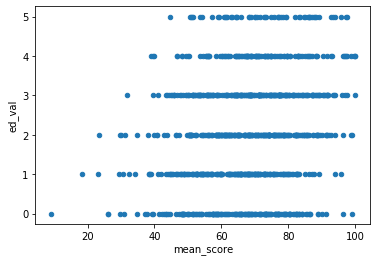

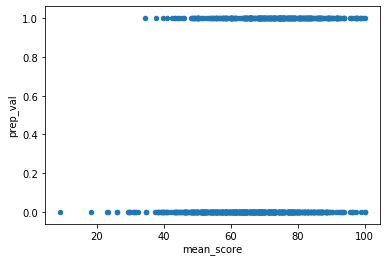

In [9]:
def mpl_plot(df, x, y):
    df.plot.scatter(x, y)

mpl_plot(df2, 'mean_score', 'ed_val')
mpl_plot(df2, 'mean_score', 'prep_val')
# mpl_plot(df2, 'mean_score', 'race/ethnicity')
# dfmed1

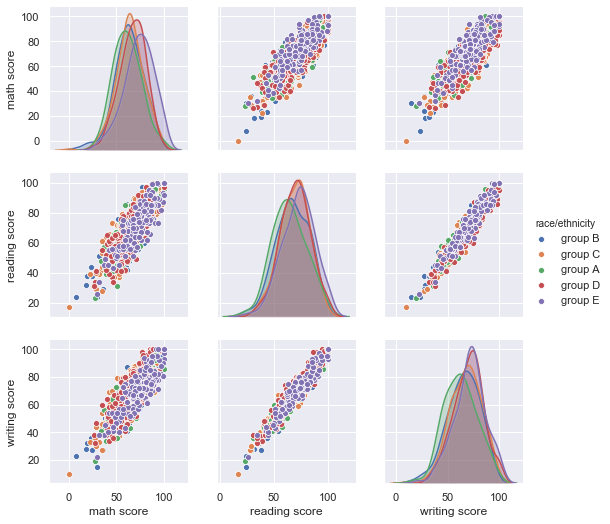

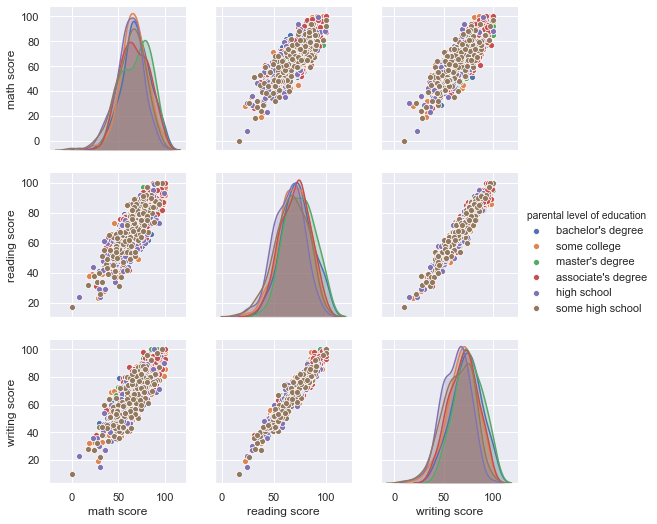

In [10]:
def sb_plot(df, hue):
    sns.set()
    sns.pairplot(data=df, hue=hue);
    
sb_plot(df, hue='race/ethnicity')
sb_plot(df, hue='parental level of education')